Research Question


*   Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018


Bonus Questions



*   What is the most popular hour for returning cars?
*   What station is the most popular?
     Overall?
     At the most popular picking hour?


*  What postal code is the most popular for picking up Bluecars? Does the most popular station belong to that postal code?

   Overall?
   At the most popular picking hour?

*  Do the results change if you consider Utilib and Utilib 1.4 instead of Bluecars? (that could be asked earlier to push students to write modular code that can be used to query different things)





# Data Cleaning

---




In [0]:
# Importing the pandas and numpy libraries to use in the dataset from the url  

import pandas as pd
import numpy as np

In [0]:
# Loading the electric cars dataset from the url = 'http://bit.ly/Autolibdataset'
url = 'http://bit.ly/Autolibdataset'
df = pd.read_csv(url, index_col = 0)
#showing the first rows of records from the dataset
df.head()


/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,24 Rue Vulpian,3,3,1,0,1,operational,Paris,NaN,paris-vulpian-24,STATION,"48.8310493, 2.3460584",75013,Paris/Vulpian/24,operational,NaN,1,station,ok,nonexistent,2018,4,1,0,0
1,8 Boulevard Richard Lenoir,0,0,0,0,1,operational,Paris,NaN,paris-richardlenoir-8,STATION,"48.8545026, 2.370183",75011,Paris/Richard Lenoir/8,operational,NaN,3,station,ok,nonexistent,2018,4,1,0,0
2,4 Rue Charles Bossut,3,3,0,0,1,operational,Paris,NaN,paris-charlesbossut-4,STATION,"48.8431847, 2.3837959",75012,Paris/Charles Bossut/4,operational,NaN,2,station,ok,nonexistent,2018,4,1,0,0
3,3 avenue Claude Vellefaux,4,4,0,0,0,operational,Paris,NaN,paris-claudevellefaux-3,STATION,"48.8740623, 2.3703034",75010,Paris/Claude Vellefaux/3,operational,NaN,1,station,ok,nonexistent,2018,4,1,0,0
4,236 Boulevard Voltaire,1,1,0,0,1,operational,Paris,NaN,paris-voltaire-236,STATION,"48.852023, 2.389719",75011,Paris/Voltaire/236,operational,NaN,4,station,ok,nonexistent,2018,4,1,0,0


In [0]:
#getting to know the number of columns and rows in the data set
df.shape

(14421829, 25)

In [0]:
df['Cars'].sum()

34097245

In [0]:
#checked to see total number of cars and bluecar column
#they are same, dropping the cars column
df['Bluecar counter'].sum()

34097245

In [0]:
#dropping the rows that are unnecessary 
df.drop(['Address','Cars','Charge Slots','Charging Status','Displayed comment','Scheduled at', 'Slots','Geo point'], axis = 1, inplace = True)

In [0]:
df.columns

Index(['Bluecar counter', 'Utilib counter', 'Utilib 1.4 counter', 'City', 'ID',
       'Kind', 'Postal code', 'Public name', 'Rental status', 'Station type',
       'Status', 'Subscription status', 'year', 'month', 'day', 'hour',
       'minute'],
      dtype='object')

In [0]:
#converting column names to lower case
df.columns = map(str.lower, df.columns)
df.columns

Index(['bluecar counter', 'utilib counter', 'utilib 1.4 counter', 'city', 'id',
       'kind', 'postal code', 'public name', 'rental status', 'station type',
       'status', 'subscription status', 'year', 'month', 'day', 'hour',
       'minute'],
      dtype='object')

In [0]:
#replace ' ' with '_'
df.columns = df.columns.str.strip().str.replace(' ','_')
df.columns

Index(['bluecar_counter', 'utilib_counter', 'utilib_1.4_counter', 'city', 'id',
       'kind', 'postal_code', 'public_name', 'rental_status', 'station_type',
       'status', 'subscription_status', 'year', 'month', 'day', 'hour',
       'minute'],
      dtype='object')

In [0]:
#saving the cleaned data set to a csv file
df.to_csv('parking.csv')

In [0]:
#reading csv file while converting the columns hour and minute to string
parking = pd.read_csv('parking.csv', index_col= 0, dtype = {'hour':str, 'minute':str})
parking.head()

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,bluecar_counter,utilib_counter,utilib_1.4_counter,city,id,kind,postal_code,public_name,rental_status,station_type,status,subscription_status,year,month,day,hour,minute
0,3,1,0,Paris,paris-vulpian-24,STATION,75013,Paris/Vulpian/24,operational,station,ok,nonexistent,2018,4,1,0,0
1,0,0,0,Paris,paris-richardlenoir-8,STATION,75011,Paris/Richard Lenoir/8,operational,station,ok,nonexistent,2018,4,1,0,0
2,3,0,0,Paris,paris-charlesbossut-4,STATION,75012,Paris/Charles Bossut/4,operational,station,ok,nonexistent,2018,4,1,0,0
3,4,0,0,Paris,paris-claudevellefaux-3,STATION,75010,Paris/Claude Vellefaux/3,operational,station,ok,nonexistent,2018,4,1,0,0
4,1,0,0,Paris,paris-voltaire-236,STATION,75011,Paris/Voltaire/236,operational,station,ok,nonexistent,2018,4,1,0,0


In [0]:
parking.columns

Index(['bluecar_counter', 'utilib_counter', 'utilib_1.4_counter', 'city', 'id',
       'kind', 'postal_code', 'public_name', 'rental_status', 'station_type',
       'status', 'subscription_status', 'year', 'month', 'day', 'hour',
       'minute'],
      dtype='object')

In [0]:
#combining the year, month and day into one column
parking['date'] = pd.to_datetime((parking.year*10000+parking.month*100+parking.day).apply(str),format='%Y%m%d')

In [0]:
#concating the hour and minute column to one column
parking['time'] = parking.hour.str.cat([parking.minute], sep = ':')

In [0]:
parking.dtypes

bluecar_counter                 int64
utilib_counter                  int64
utilib_1.4_counter              int64
city                           object
id                             object
kind                           object
postal_code                     int64
public_name                    object
rental_status                  object
station_type                   object
status                         object
subscription_status            object
year                            int64
month                           int64
day                             int64
hour                           object
minute                         object
date                   datetime64[ns]
time                           object
dtype: object

In [0]:
#dropping the year and month column after combining to date column
parking.drop(['year', 'month',], axis = 1, inplace = True)

In [0]:
parking.columns

Index(['bluecar_counter', 'utilib_counter', 'utilib_1.4_counter', 'city', 'id',
       'kind', 'postal_code', 'public_name', 'rental_status', 'station_type',
       'status', 'subscription_status', 'day', 'hour', 'minute', 'date',
       'time'],
      dtype='object')

In [0]:
#converting the parking dataframe to a csv file
parking.to_csv('cars.csv')

# Data Analysis

---




In [0]:
# Loading the cars dataset from the csv file
cars = pd.read_csv('cars.csv',index_col = 0)
cars.head(5)



/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,bluecar_counter,utilib_counter,utilib_1.4_counter,city,id,kind,postal_code,public_name,rental_status,station_type,status,subscription_status,day,hour,minute,date,time
0,3,1,0,Paris,paris-vulpian-24,STATION,75013,Paris/Vulpian/24,operational,station,ok,nonexistent,1,0,0,2018-04-01,0:0
1,0,0,0,Paris,paris-richardlenoir-8,STATION,75011,Paris/Richard Lenoir/8,operational,station,ok,nonexistent,1,0,0,2018-04-01,0:0
2,3,0,0,Paris,paris-charlesbossut-4,STATION,75012,Paris/Charles Bossut/4,operational,station,ok,nonexistent,1,0,0,2018-04-01,0:0
3,4,0,0,Paris,paris-claudevellefaux-3,STATION,75010,Paris/Claude Vellefaux/3,operational,station,ok,nonexistent,1,0,0,2018-04-01,0:0
4,1,0,0,Paris,paris-voltaire-236,STATION,75011,Paris/Voltaire/236,operational,station,ok,nonexistent,1,0,0,2018-04-01,0:0


In [0]:
#subsetting the data frame to only select only stations in Paris
pariscity = cars[(cars.city == 'Paris')]
pariscity.head()

,bluecar_counter,utilib_counter,utilib_1.4_counter,city,id,kind,postal_code,public_name,rental_status,station_type,status,subscription_status,day,hour,minute,date,time
0,3,1,0,Paris,paris-vulpian-24,STATION,75013,Paris/Vulpian/24,operational,station,ok,nonexistent,1,0,0,2018-04-01,0:0
1,0,0,0,Paris,paris-richardlenoir-8,STATION,75011,Paris/Richard Lenoir/8,operational,station,ok,nonexistent,1,0,0,2018-04-01,0:0
2,3,0,0,Paris,paris-charlesbossut-4,STATION,75012,Paris/Charles Bossut/4,operational,station,ok,nonexistent,1,0,0,2018-04-01,0:0
3,4,0,0,Paris,paris-claudevellefaux-3,STATION,75010,Paris/Claude Vellefaux/3,operational,station,ok,nonexistent,1,0,0,2018-04-01,0:0
4,1,0,0,Paris,paris-voltaire-236,STATION,75011,Paris/Voltaire/236,operational,station,ok,nonexistent,1,0,0,2018-04-01,0:0


In [0]:
pariscity.shape

(7874596, 17)

In [0]:
#most popular hour of the day for picking shared electric blue car in Paris
pariscity.groupby(['hour'])['bluecar_counter'].sum()
#print(x)
#.sort_values(ascending = False)

hour
0     560500
1     574561
2     639105
3     651668
4     649731
5     656438
6     663695
7     648282
8     600351
9     600840
10    623957
11    614350
12    576251
13    582326
14    589145
15    574919
16    563497
17    550459
18    538036
19    519875
20    557945
21    624931
22    611627
23    556928
Name: bluecar_counter, dtype: int64

In [0]:
#most popular hour of the day for picking shared electric blue car in Paris
x.diff().sort_values(ascending = False)

hour
21    66986.0
2     64544.0
20    38070.0
10    23117.0
1     14061.0
3     12563.0
6      7257.0
14     6819.0
5      6707.0
13     6075.0
9       489.0
4     -1937.0
11    -9607.0
16   -11422.0
18   -12423.0
17   -13038.0
22   -13304.0
15   -14226.0
7    -15413.0
19   -18161.0
12   -38099.0
8    -47931.0
23   -54699.0
0         NaN
Name: bluecar_counter, dtype: float64

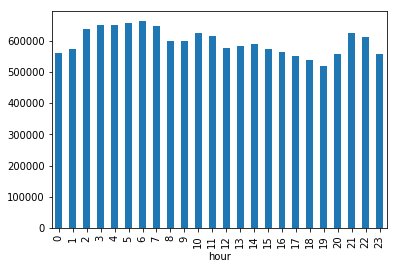

In [0]:
pariscity.groupby(['hour'])['bluecar_counter'].sum().plot(kind = 'bar')

In [0]:
pariscity.bluecar_counter.diff().sort_values(ascending= False)

In [0]:
#creeating a new column and getting the sum of the 3 types of cars: bluecar_counter,utilib_counter,utilib_1.4_counter
pariscity['Car_Total']= pariscity.iloc[:, 0:4].sum(axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
pariscity.head(5)

,bluecar_counter,utilib_counter,utilib_1.4_counter,city,id,kind,postal_code,public_name,rental_status,station_type,status,subscription_status,day,hour,minute,date,time,Car_Total
0,3,1,0,Paris,paris-vulpian-24,STATION,75013,Paris/Vulpian/24,operational,station,ok,nonexistent,1,0,0,2018-04-01,0:0,4
1,0,0,0,Paris,paris-richardlenoir-8,STATION,75011,Paris/Richard Lenoir/8,operational,station,ok,nonexistent,1,0,0,2018-04-01,0:0,0
2,3,0,0,Paris,paris-charlesbossut-4,STATION,75012,Paris/Charles Bossut/4,operational,station,ok,nonexistent,1,0,0,2018-04-01,0:0,3
3,4,0,0,Paris,paris-claudevellefaux-3,STATION,75010,Paris/Claude Vellefaux/3,operational,station,ok,nonexistent,1,0,0,2018-04-01,0:0,4
4,1,0,0,Paris,paris-voltaire-236,STATION,75011,Paris/Voltaire/236,operational,station,ok,nonexistent,1,0,0,2018-04-01,0:0,1


In [0]:
pariscity.columns

Index(['bluecar_counter', 'utilib_counter', 'utilib_1.4_counter', 'city', 'id',
       'kind', 'postal_code', 'public_name', 'rental_status', 'station_type',
       'status', 'subscription_status', 'day', 'hour', 'minute', 'date',
       'time', 'Car_Total'],
      dtype='object')

In [0]:
#Most popular station in Paris in terms of the total number of cars
pariscity.groupby(['id'])['Car_Total'].sum().sort_values(ascending = False).head()

id
paris-portesaintcloud-parking      71800
paris-versaillesreynaud-parking    67970
paris-picpusnation-parking         64766
paris-gouvionmaillot-parking       63415
paris-lacordaire-56                60294
Name: Car_Total, dtype: int64

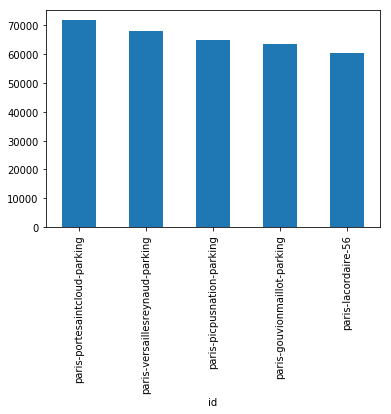

In [0]:
pariscity.groupby(['id'])['Car_Total'].sum().sort_values(ascending = False).head().plot(kind = 'bar')

In [0]:
#Most popular station and most picking hour in Paris in terms of the total number of cars
pariscity.groupby(['id','hour'])['Car_Total'].sum().sort_values(ascending = False).head(15)

id                               hour
paris-portesaintcloud-parking    12      3238
                                 11      3236
                                 14      3216
                                 18      3213
                                 7       3196
                                 19      3194
                                 10      3190
                                 13      3178
                                 15      3172
                                 16      3162
                                 6       3159
                                 17      3141
paris-versaillesreynaud-parking  5       3106
                                 2       3092
                                 4       3090
Name: Car_Total, dtype: int64

In [0]:
#most popular postal code for picking up blue cars
cars.groupby(['postal_code','hour'])['bluecar_counter'].sum().sort_values(ascending = False).head()

postal_code  hour
75015        6       92407
             5       91494
             4       89615
             3       89528
             7       89175
Name: bluecar_counter, dtype: int64

In [0]:
#most popular postal code and picking hourfor picking up blue cars
cars.groupby(['postal_code','hour'])['bluecar_counter'].sum().sort_values(ascending = False).head()

postal_code  hour
75015        6       92407
             5       91494
             4       89615
             3       89528
             7       89175
Name: bluecar_counter, dtype: int64

In [0]:
#most popular station
pariscity.groupby(['id','postal_code'])['Car_Total'].sum().sort_values(ascending = False).head()

id                               postal_code
paris-portesaintcloud-parking    75016          71800
paris-versaillesreynaud-parking  75016          67970
paris-picpusnation-parking       75012          64766
paris-gouvionmaillot-parking     75017          63415
paris-lacordaire-56              75015          60294
Name: Car_Total, dtype: int64

In [0]:
#when using utilib
cars.groupby(['id','postal_code','hour'])['utilib_counter'].sum().sort_values(ascending = False).head()

id                        postal_code  hour
colombes-gounod-1         92700        11      464
                                       10      459
                                       12      447
nanterre-julesquentin-33  92000        17      429
colombes-gounod-1         92700        13      429
Name: utilib_counter, dtype: int64

In [0]:
#when using utilib 1.4
cars.groupby(['id','postal_code','hour'])['utilib_1.4_counter'].sum().sort_values(ascending = False).head()

id                      postal_code  hour
sevres-granderue-123    92310        7       546
drancy-rogersalengro-3  93700        11      545
                                     6       545
                                     2       545
sevres-granderue-123    92310        3       544
Name: utilib_1.4_counter, dtype: int64